In [6]:
!pip install keras tensorflow

In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
import h5py

In [9]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = 2000

# エポック数
epochs = 100

In [10]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 54s 5us/step
60000 train samples
10000 test samples


In [11]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 2つ目の隠れ層(256 -> 出力128)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3つ目の隠れ層(128 -> 出力32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 出力層(入力32 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [12]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 111us/step


[0.23741768792122603, 0.9319000244140625]

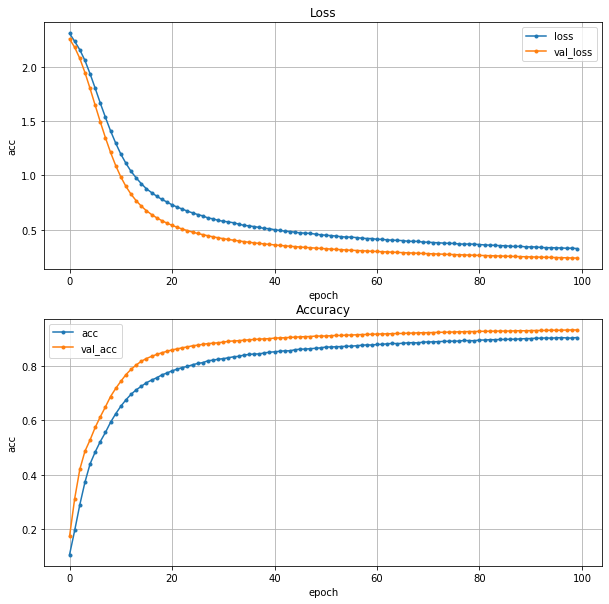

In [16]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()